In [147]:
%matplotlib inline 
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import seaborn
import scipy.stats as sts
from scipy.stats import linregress
from sklearn import datasets

In [148]:
 # Make a reference to the books.csv file path
file = "NBA_Shooting_Stats_1984-2019.csv"

# Import the books.csv file as a DataFrame
df = pd.read_csv(file, encoding="utf-8")
df.head()

,SEASON,#,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,1984-85,1,Bernard King,55,37.5,32.9,12.6,23.7,53.0,0.0,...,10.0,77.2,2.1,3.7,5.8,3.7,1.3,0.3,3.7,26.8
1,1984-85,2,Larry Bird,80,39.5,28.7,11.5,22.0,52.2,0.7,...,5.7,88.2,2.1,8.5,10.5,6.6,1.6,1.2,3.1,34.4
2,1984-85,3,Michael Jordan,82,38.3,28.2,10.2,19.8,51.5,0.1,...,9.1,84.5,2.0,4.5,6.5,5.9,2.4,0.8,3.5,29.2
3,1984-85,4,Purvis Short,78,39.5,28.0,10.5,22.8,46.0,0.6,...,7.9,81.7,2.0,3.1,5.1,3.0,1.5,0.3,3.1,21.1
4,1984-85,5,Alex English,81,36.1,27.9,11.6,22.4,51.8,0.0,...,5.7,82.9,2.5,3.1,5.7,4.2,1.2,0.6,3.1,24.8


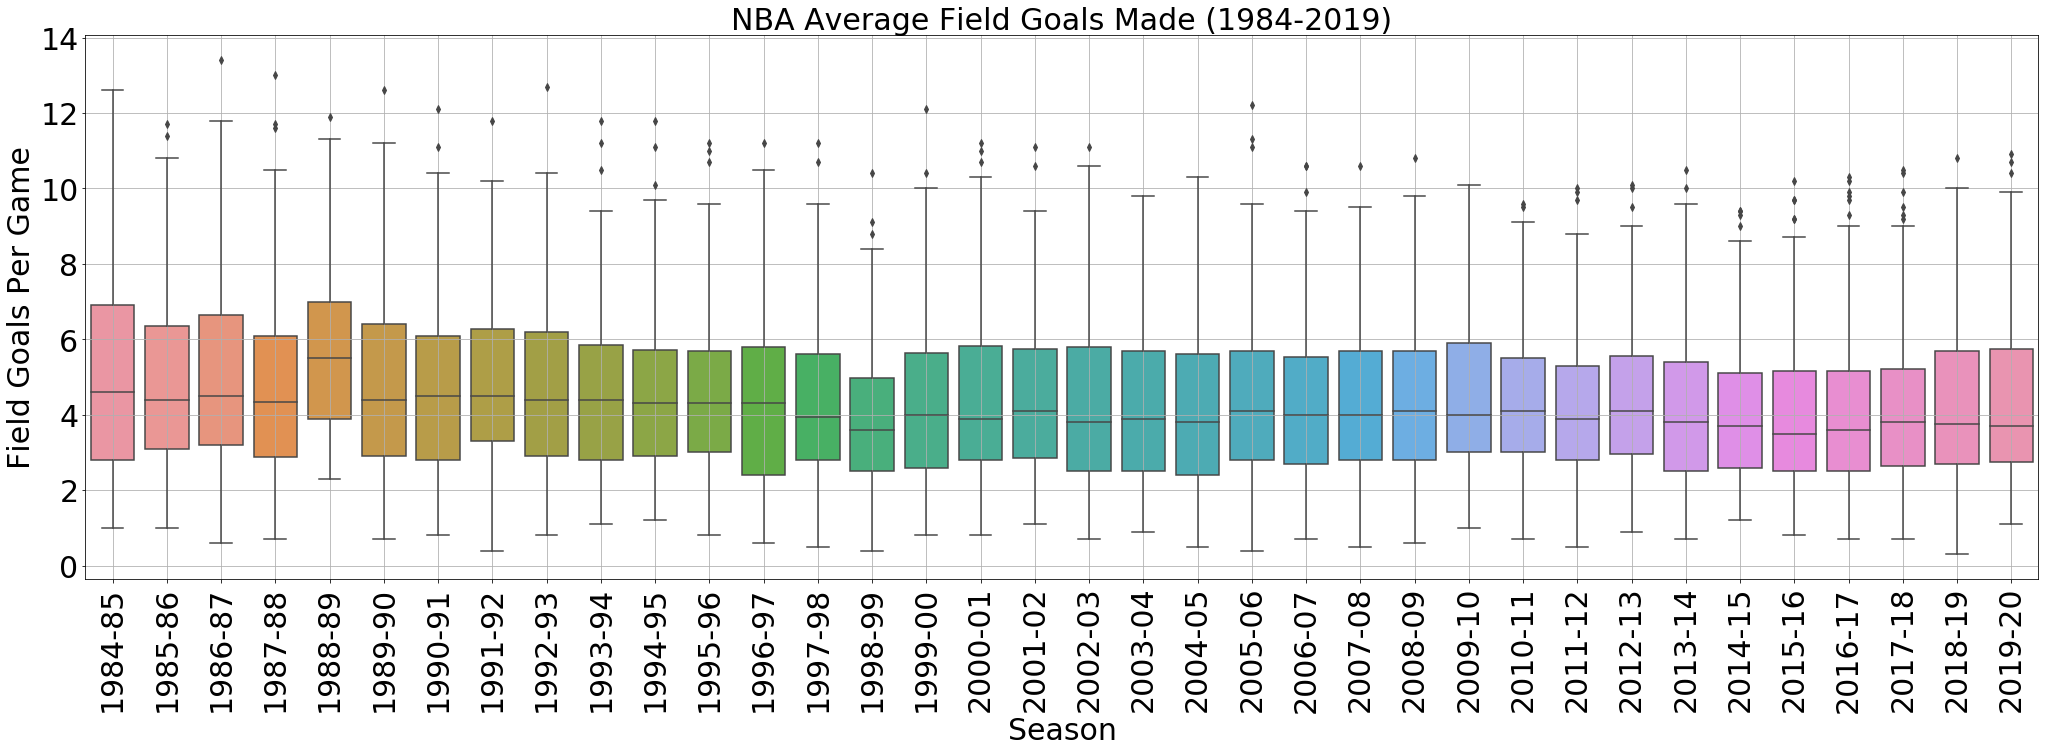

In [149]:
fig, ax = plt.subplots(figsize=(35,10))
plt.title('NBA Average Field Goals Made (1984-2019)', fontsize=30)
seaborn.boxplot(df['SEASON'],df['FGM'], ax=ax)
plt.xlabel("Season", fontsize=30)
plt.ylabel("Field Goals Per Game", fontsize=30)
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30)
plt.grid()
plt.savefig('NBA Average Field Goals Made (1984-2019).png')
plt.show()

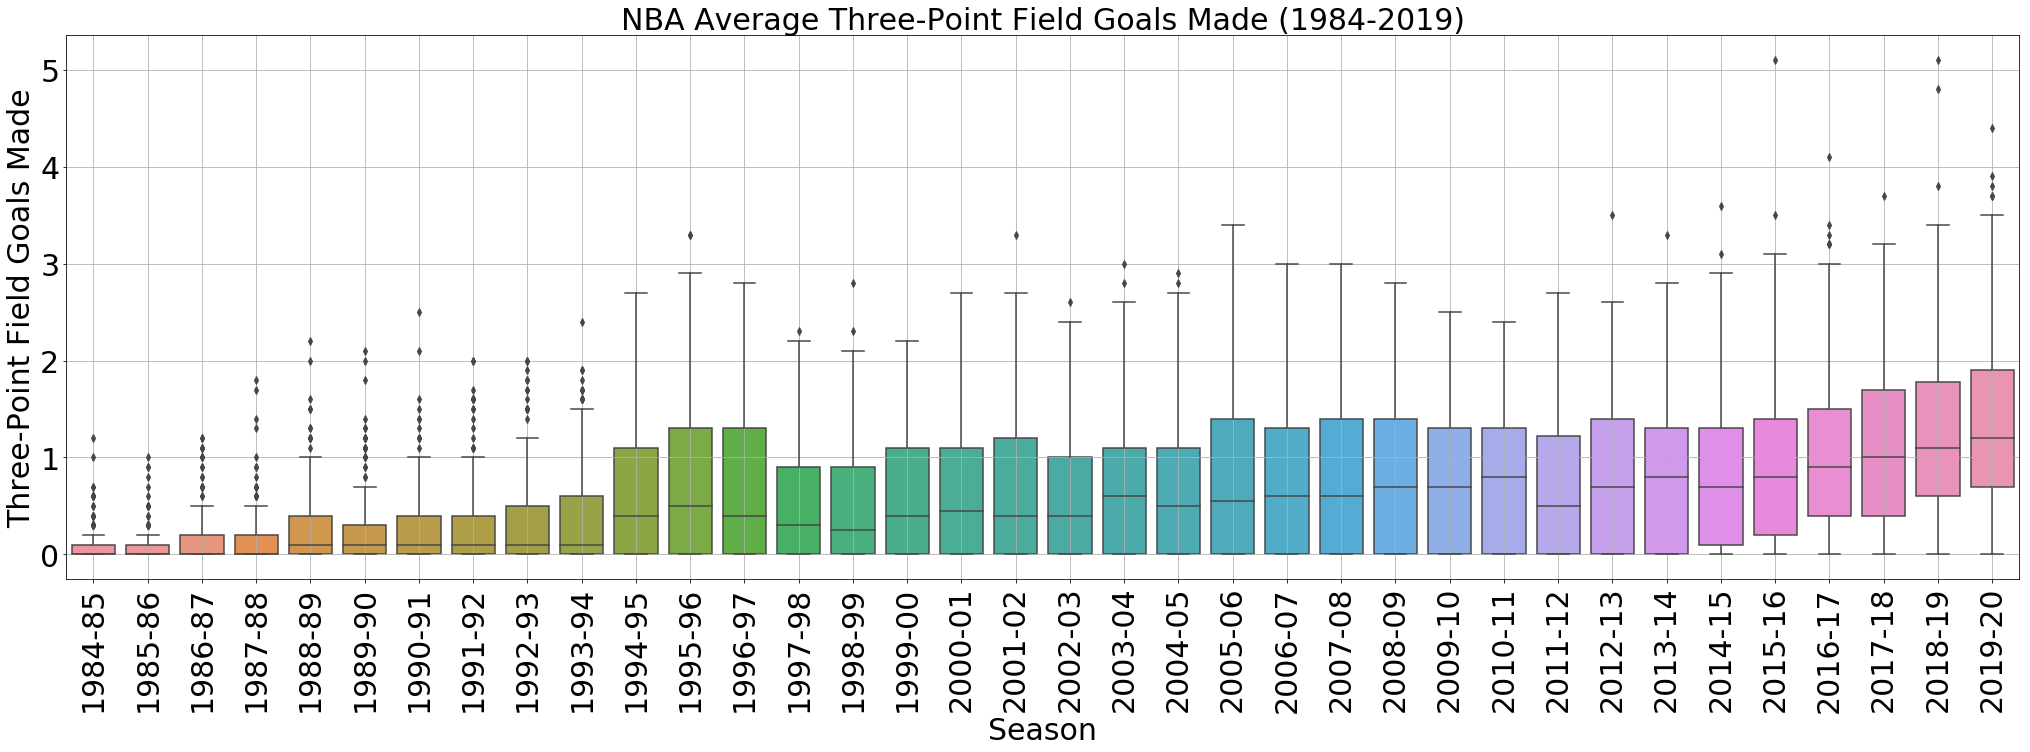

In [150]:
fig, ax = plt.subplots(figsize=(35,10))
plt.title('NBA Average Three-Point Field Goals Made (1984-2019)', fontsize=30)
seaborn.boxplot(df['SEASON'],df['3PM'], ax=ax)
plt.xlabel("Season", fontsize=30)
plt.ylabel("Three-Point Field Goals Made", fontsize=30)
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30)
plt.grid()
plt.savefig('NBA Average Three-Point Field Goals Made (1984-2019).png')
plt.show()

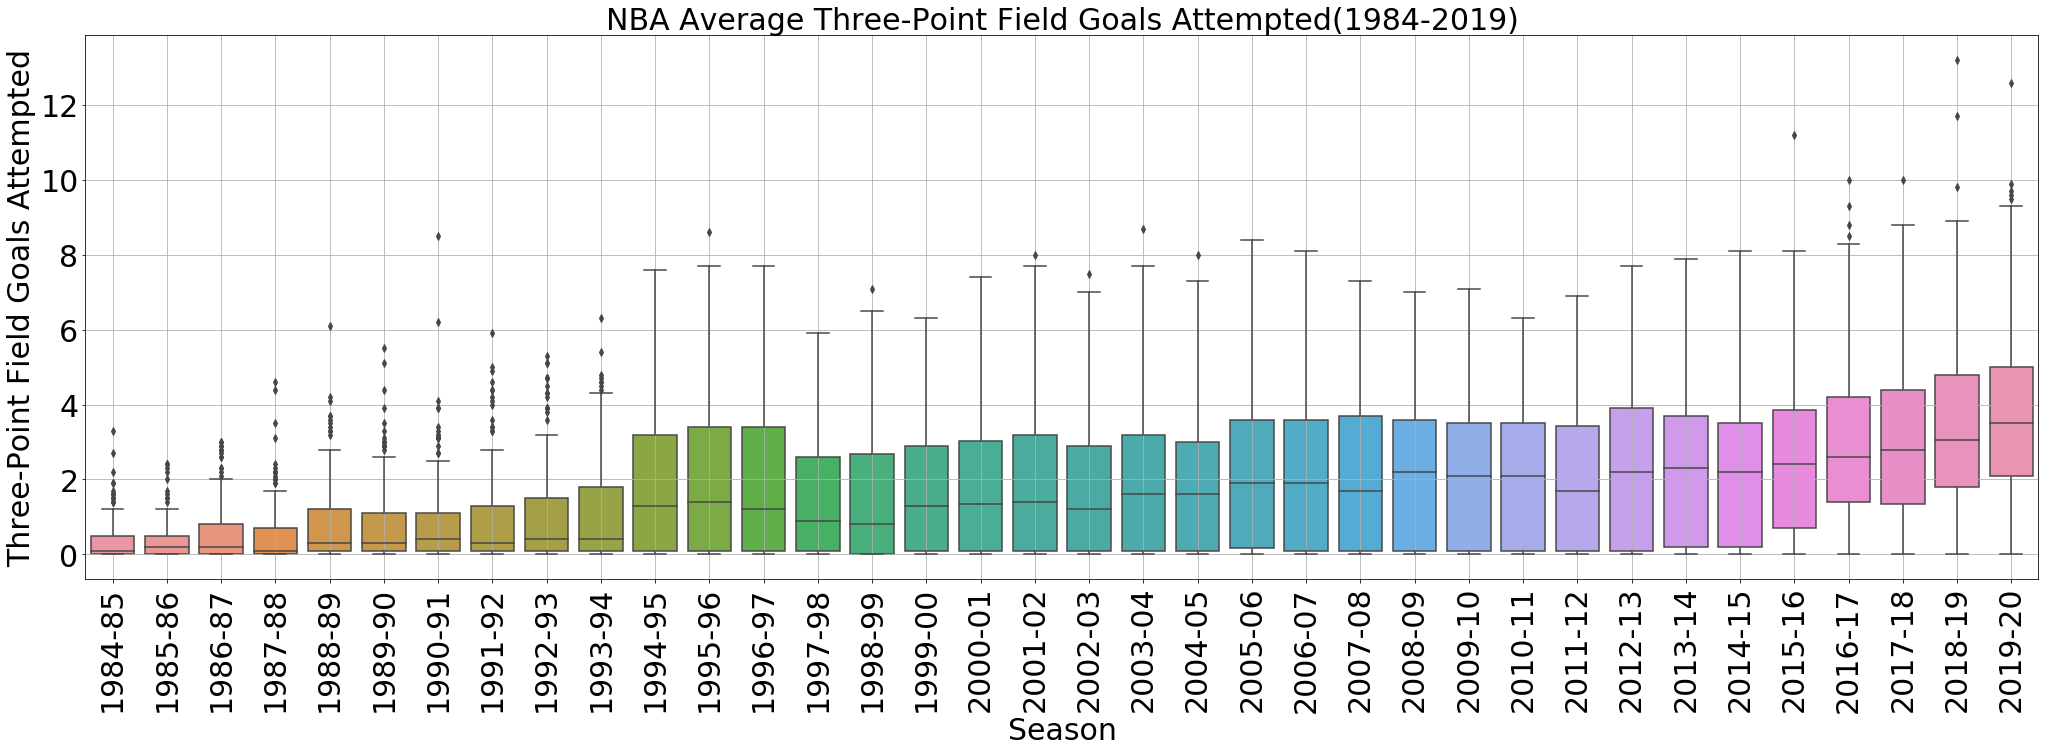

In [151]:
fig, ax = plt.subplots(figsize=(35,10))
plt.title('NBA Average Three-Point Field Goals Attempted(1984-2019)', fontsize=30)
seaborn.boxplot(df['SEASON'],df['3PA'], ax=ax)
plt.xlabel("Season", fontsize=30)
plt.ylabel("Three-Point Field Goals Attempted", fontsize=30)
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30)
plt.grid()
plt.show()

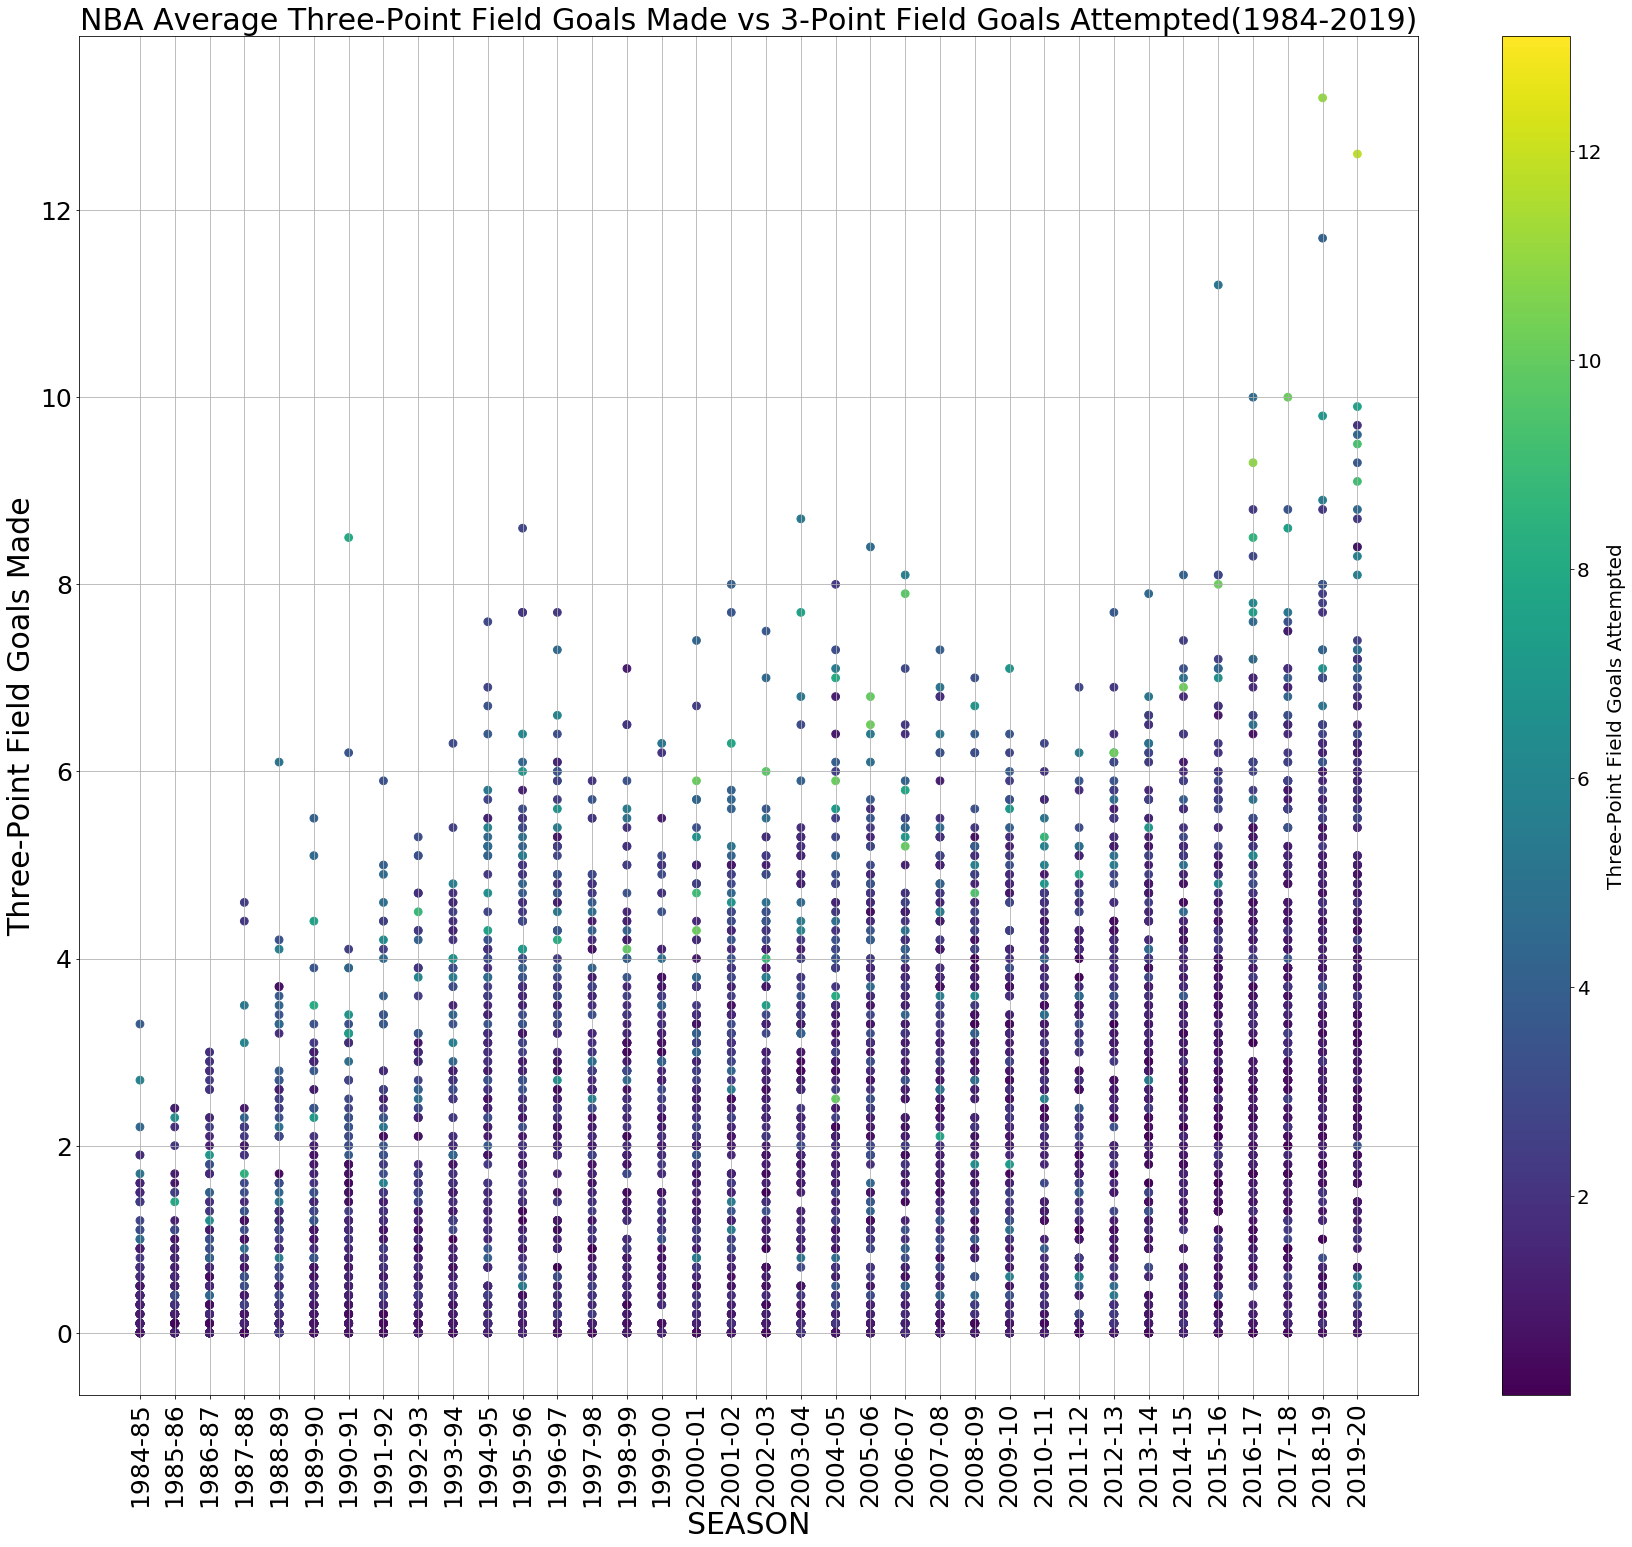

In [152]:
# plot the latitude and longitude of the California housing data using Matplotlib, color the data points using the median income of the block.
fig, ax = plt.subplots(figsize=(30,25))
plt.title('NBA Average Three-Point Field Goals Made vs 3-Point Field Goals Attempted(1984-2019)', fontsize=30)
plt.scatter(df['SEASON'],df['3PA'],60, c=df['FTA'])
clb = plt.colorbar()
clb.ax.tick_params(labelsize=20)
plt.xlabel("SEASON", fontsize=30)
plt.ylabel("Three-Point Field Goals Made",fontsize=30)
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)
clb.set_label("Three-Point Field Goals Attempted", fontsize=20)
plt.grid()
plt.savefig('NBA Average Three-Point Field Goals Made vs 3-Point Field Goals Attempted(1984-2019).png')
plt.show()


# Quartile Calculations

In [153]:
#quartile calculations
quartiles = df['3PA'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Three Point Field Goals Made is: {lowerq}")
print(f"The upper quartile of Three Point Field Goals Made is: {upperq}")
print(f"The interquartile range of Three Point Field Goals Made is: {iqr}")
print(f"The median of Three Point Field Goals Made is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Three Point Field Goals Made is: 0.1
The upper quartile of Three Point Field Goals Made is: 3.2
The interquartile range of Three Point Field Goals Made is: 3.1
The median of Three Point Field Goals Made is: 1.3 
Values below -4.550000000000001 could be outliers.
Values above 7.8500000000000005 could be outliers.


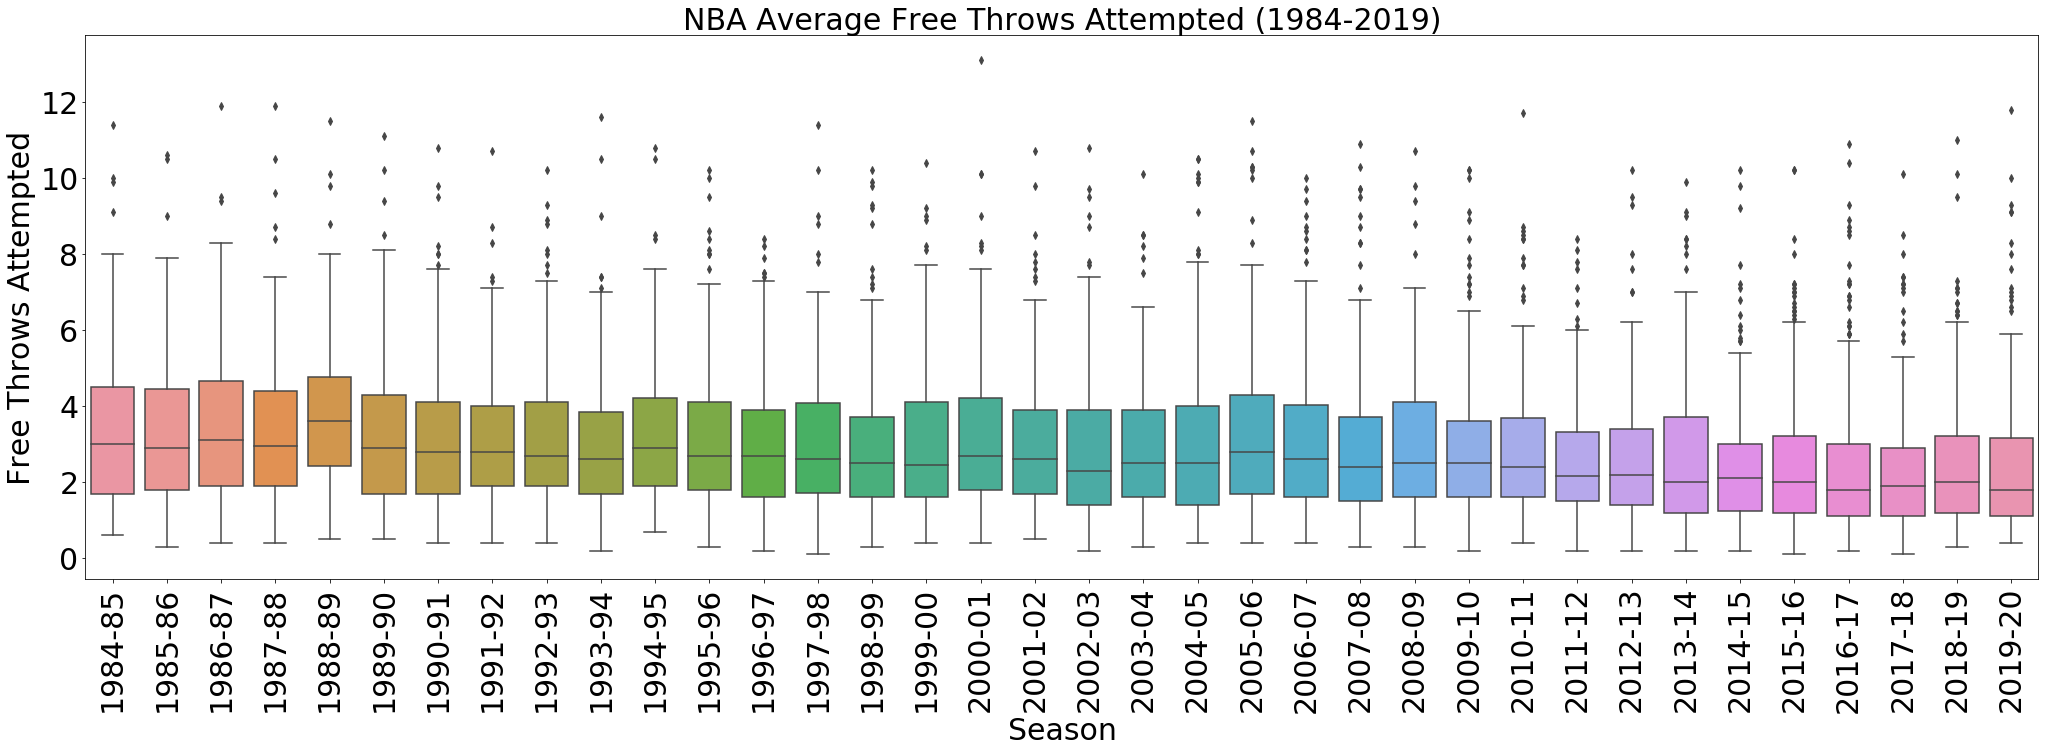

In [154]:
fig, ax = plt.subplots(figsize=(35,10))
plt.title('NBA Average Free Throws Attempted (1984-2019)', fontsize=30)
seaborn.boxplot(df['SEASON'],df['FTA'], ax=ax)
plt.xlabel("Season", fontsize=30)
plt.ylabel("Free Throws Attempted", fontsize=30)
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30)
plt.show()

In [189]:
# Using .rename(columns={}) in order to rename columns
renamed_df = df.rename(columns={"GP":"Games Played","PTS":"Points",
                                "MIN": "Minutes Played Per Game", 
                                "FGM": "Field Goals Per Game", "FGA":"Field Goals Attempted",
                               "FGA": "Field Goal Attempts Per Game", 
                                "3PM": "3-Point Field Goals Per Game", "FT": "Free Throws Per Game",
                                "FTA": "Free Throw Attempts Per Game", "TRB": "Total Rebounds Per Game",
                                "AST": "Assists Per Game", "STL": "Steals Per Game", "BLK": "Blocks Per Game",
                                "TOV": "Turnovers Per Game", "PTS": "Points", "SOS": "Strength of Schedule"})
renamed_df.head()

,SEASON,#,PLAYER,Games Played,Minutes Played Per Game,Points,Field Goals Per Game,Field Goal Attempts Per Game,FG%,3-Point Field Goals Per Game,...,Free Throw Attempts Per Game,FT%,OREB,DREB,REB,Assists Per Game,Steals Per Game,Blocks Per Game,Turnovers Per Game,EFF
0,1984-85,1,Bernard King,55,37.5,32.9,12.6,23.7,53.0,0.0,...,10.0,77.2,2.1,3.7,5.8,3.7,1.3,0.3,3.7,26.8
1,1984-85,2,Larry Bird,80,39.5,28.7,11.5,22.0,52.2,0.7,...,5.7,88.2,2.1,8.5,10.5,6.6,1.6,1.2,3.1,34.4
2,1984-85,3,Michael Jordan,82,38.3,28.2,10.2,19.8,51.5,0.1,...,9.1,84.5,2.0,4.5,6.5,5.9,2.4,0.8,3.5,29.2
3,1984-85,4,Purvis Short,78,39.5,28.0,10.5,22.8,46.0,0.6,...,7.9,81.7,2.0,3.1,5.1,3.0,1.5,0.3,3.1,21.1
4,1984-85,5,Alex English,81,36.1,27.9,11.6,22.4,51.8,0.0,...,5.7,82.9,2.5,3.1,5.7,4.2,1.2,0.6,3.1,24.8


In [212]:
combinedAnd_MJTotal = pd.merge(college_totals_df, renamed_df, on="Field Goals Per Game",how="left")
combinedAnd_MJTotal= combinedAnd_MJTotal.set_index("Season")
combinedAnd_MJTotal.head()

,School,Conf,Games Played_x,Games Started,Minutes Played Per Game_x,Field Goals Per Game,Field Goal Attempts Per Game_x,FG%_x,2-Point Field Goals Per Game,2PA,...,Free Throw Attempts Per Game_y,FT%_y,OREB,DREB,REB,Assists Per Game_y,Steals Per Game_y,Blocks Per Game_y,Turnovers Per Game_y,EFF
Season,,,,,,,,,,,,,,,,,,,,,
1981-82,UNC,ACC,34,NaN,1079,191,358,0.534,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-83,UNC,ACC,36,NaN,1113,282,527,0.535,248.0,451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-84,UNC,ACC,31,NaN,915,247,448,0.551,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Career,UNC,NaN,101,NaN,3107,720,1333,0.540,248.0,451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
# The next example will compute the Pearson correlation coefficient between "Field Goals Made" and "Three-Points Made"
FGM = df.iloc[:,6]
ThreePM = df.iloc[:,9]
correlation = sts.pearsonr(FGM,ThreePM)
print(f"The correlation between both factors is {round(correlation[0],2)}") 
print(f"r<0.3 means there is a very weak or none correlation.")

The correlation between both factors is 0.26
r<0.3 means there is a very weak or none correlation.


The r-squared is: 0.25964171591300755


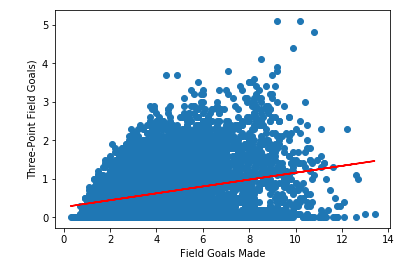

In [174]:
# Add the linear regression equation and line to plot
x_values = df['FGM']
y_values = df['3PM']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Field Goals Made')
plt.ylabel('Three-Point Field Goals)')
print(f"The r-squared is: {rvalue}")
plt.show()

# Michael Jordan's College Basketball Statistics

## Per Game Statistics

In [159]:
 # Make a reference to the books.csv file path
file2 = "MJ_college_stats.csv"

# Import the books.csv file as a DataFrame
college_per_game_df = pd.read_csv(file2, encoding="utf-8")
college_per_game_df.head()

,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,...,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 25,SOS
0,1981-82,UNC,ACC,34,NaN,31.7,5.6,10.5,0.534,NaN,...,0.722,4.4,1.8,1.2,0.2,1.7,2.7,13.5,NaN,8.87
1,1982-83,UNC,ACC,36,NaN,30.9,7.8,14.6,0.535,6.9,...,0.737,5.5,1.6,2.2,0.8,2.1,3.1,20.0,NaN,7.68
2,1983-84,UNC,ACC,31,NaN,29.5,8.0,14.5,0.551,NaN,...,0.779,5.3,2.1,1.6,1.1,2.2,2.3,19.6,NaN,8.60
3,Career,UNC,NaN,101,NaN,30.8,7.1,13.2,0.540,6.9,...,0.748,5.0,1.8,1.7,0.7,2.0,2.7,17.7,NaN,8.39


# Mean, Median, Mode

In [201]:
Field_Goals_Per_Game = college_per_game_df['Field Goals Per Game']

In [202]:
# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(Field_Goals_Per_Game )
print(f"The mean field goals per game during Michael Jordan's college years was {mean_numpy}")

median_numpy = np.median(Field_Goals_Per_Game )
print(f"The median field goals per game during Michael Jordan's college years was {median_numpy}")

mode_scipy = sts.mode(Field_Goals_Per_Game )
print(f"The mode field goals per game during Michael Jordan's college years was {mode_scipy}")

The mean field goals per game during Michael Jordan's college years was 7.125
The median field goals per game during Michael Jordan's college years was 7.449999999999999
The mode field goals per game during Michael Jordan's college years was ModeResult(mode=array([5.6]), count=array([1]))


In [160]:
college_per_game_df.describe()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 25,SOS
count,4.000000,0.0,4.000000,4.000000,4.000000,4.000000,2.0,2.0,2.00,2.0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.0,4.000000
mean,50.500000,NaN,30.725000,7.125000,13.200000,0.540000,6.9,12.5,0.55,0.9,...,0.746500,5.050000,1.825000,1.675000,0.700000,2.000000,2.700000,17.700000,NaN,8.385000
std,33.729315,NaN,0.910586,1.087428,1.909625,0.007789,0.0,0.0,0.00,0.0,...,0.024145,0.479583,0.206155,0.411299,0.374166,0.216025,0.326599,2.974335,NaN,0.509411
min,31.000000,NaN,29.500000,5.600000,10.500000,0.534000,6.9,12.5,0.55,0.9,...,0.722000,4.400000,1.600000,1.200000,0.200000,1.700000,2.300000,13.500000,NaN,7.680000
25%,33.250000,NaN,30.475000,6.725000,12.525000,0.534750,6.9,12.5,0.55,0.9,...,0.733250,4.850000,1.750000,1.500000,0.575000,1.925000,2.600000,16.650000,NaN,8.212500
50%,35.000000,NaN,30.850000,7.450000,13.850000,0.537500,6.9,12.5,0.55,0.9,...,0.742500,5.150000,1.800000,1.650000,0.750000,2.050000,2.700000,18.650000,NaN,8.495000
75%,52.250000,NaN,31.100000,7.850000,14.525000,0.542750,6.9,12.5,0.55,0.9,...,0.755750,5.350000,1.875000,1.825000,0.875000,2.125000,2.800000,19.700000,NaN,8.667500
max,101.000000,NaN,31.700000,8.000000,14.600000,0.551000,6.9,12.5,0.55,0.9,...,0.779000,5.500000,2.100000,2.200000,1.100000,2.200000,3.100000,20.000000,NaN,8.870000


In [161]:
# Using .rename(columns={}) in order to rename columns
college_per_game_df = college_per_game_df.rename(columns={"G":"Games Played", "GS":"Games Started", 
                               "MP": "Minutes Played Per Game", "FG": "Field Goals Per Game",
                               "FGA": "Field Goal Attempts Per Game", "2P": "2-Point Field Goals Per Game",
                                "3P": "3-Point Field Goals Per Game", "FT": "Free Throws Per Game",
                                "FTA": "Free Throw Attempts Per Game", "TRB": "Total Rebounds Per Game",
                                "AST": "Assists Per Game", "STL": "Steals Per Game", "BLK": "Blocks Per Game",
                                "TOV": "Turnovers Per Game", "PTS": "Points", "SOS": "Strength of Schedule"})
college_per_game_df.head()

,Season,School,Conf,Games Played,Games Started,Minutes Played Per Game,Field Goals Per Game,Field Goal Attempts Per Game,FG%,2-Point Field Goals Per Game,...,FT%,Total Rebounds Per Game,Assists Per Game,Steals Per Game,Blocks Per Game,Turnovers Per Game,PF,Points,Unnamed: 25,Strength of Schedule
0,1981-82,UNC,ACC,34,NaN,31.7,5.6,10.5,0.534,NaN,...,0.722,4.4,1.8,1.2,0.2,1.7,2.7,13.5,NaN,8.87
1,1982-83,UNC,ACC,36,NaN,30.9,7.8,14.6,0.535,6.9,...,0.737,5.5,1.6,2.2,0.8,2.1,3.1,20.0,NaN,7.68
2,1983-84,UNC,ACC,31,NaN,29.5,8.0,14.5,0.551,NaN,...,0.779,5.3,2.1,1.6,1.1,2.2,2.3,19.6,NaN,8.60
3,Career,UNC,NaN,101,NaN,30.8,7.1,13.2,0.540,6.9,...,0.748,5.0,1.8,1.7,0.7,2.0,2.7,17.7,NaN,8.39


 ## Michael Jordan's Total College Statistics

In [162]:
 # Make a reference to the .csv file path
file3 = "MJ_college_TOTAL_stats.csv"

# Import the .csv file as a DataFrame
college_totals_df = pd.read_csv(file3, encoding="utf-8")
college_totals_df.head()

,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,...,FT,FTA,FT%,TRB,AST,STL,BLK,TOV,PF,PTS
0,1981-82,UNC,ACC,34,NaN,1079,191,358,0.534,NaN,...,78,108,0.722,149,61,41,8,57,91,460
1,1982-83,UNC,ACC,36,NaN,1113,282,527,0.535,248.0,...,123,167,0.737,197,56,78,28,76,110,721
2,1983-84,UNC,ACC,31,NaN,915,247,448,0.551,NaN,...,113,145,0.779,163,64,50,35,67,70,607
3,Career,UNC,NaN,101,NaN,3107,720,1333,0.540,248.0,...,314,420,0.748,509,181,169,71,200,271,1788


In [163]:
# Using .rename(columns={}) in order to rename columns
college_totals_df = college_totals_df.rename(columns={"G":"Games Played", "GS":"Games Started", 
                               "MP": "Minutes Played Per Game", "FG": "Field Goals Per Game",
                               "FGA": "Field Goal Attempts Per Game", "2P": "2-Point Field Goals Per Game",
                                "3P": "3-Point Field Goals Per Game", "FT": "Free Throws Per Game",
                                "FTA": "Free Throw Attempts Per Game", "TRB": "Total Rebounds Per Game",
                                "AST": "Assists Per Game", "STL": "Steals Per Game", "BLK": "Blocks Per Game",
                                "TOV": "Turnovers Per Game", "PTS": "Points"})
college_totals_df.head()

,Season,School,Conf,Games Played,Games Started,Minutes Played Per Game,Field Goals Per Game,Field Goal Attempts Per Game,FG%,2-Point Field Goals Per Game,...,Free Throws Per Game,Free Throw Attempts Per Game,FT%,Total Rebounds Per Game,Assists Per Game,Steals Per Game,Blocks Per Game,Turnovers Per Game,PF,Points
0,1981-82,UNC,ACC,34,NaN,1079,191,358,0.534,NaN,...,78,108,0.722,149,61,41,8,57,91,460
1,1982-83,UNC,ACC,36,NaN,1113,282,527,0.535,248.0,...,123,167,0.737,197,56,78,28,76,110,721
2,1983-84,UNC,ACC,31,NaN,915,247,448,0.551,NaN,...,113,145,0.779,163,64,50,35,67,70,607
3,Career,UNC,NaN,101,NaN,3107,720,1333,0.540,248.0,...,314,420,0.748,509,181,169,71,200,271,1788


# Mean, Median, Mode

In [205]:
Field_Goals_Totals = college_totals_df['Field Goals Per Game']

# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(Field_Goals_Totals )
print(f"The mean field goals per game during Michael Jordan's college years was {mean_numpy}")

median_numpy = np.median(Field_Goals_Totals )
print(f"The median field goals per game during Michael Jordan's college years was {median_numpy}")

mode_scipy = sts.mode(Field_Goals_Totals )
print(f"The mode field goals per game during Michael Jordan's college years was {mode_scipy}")

The mean field goals per game during Michael Jordan's college years was 360.0
The median field goals per game during Michael Jordan's college years was 264.5
The mode field goals per game during Michael Jordan's college years was ModeResult(mode=array([191]), count=array([1]))


In [193]:
 # Make a reference to the books.csv file path
file3 = "1981_1984_NBA_Shooting_PerGame.csv"

# Import the books.csv file as a DataFrame
first_year_NBA_df = pd.read_csv(file3, encoding="utf-8")
first_year_NBA_df.head()

,SEASON,#,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,1981-1982,1,George Gervin,79,35.7,32.3,12.6,25.2,50.0,0.1,...,8.1,86.4,1.7,3.2,5.0,2.4,1.0,0.6,2.7,24.8
1,1981-1982,2,Moses Malone,81,42.0,31.1,11.7,22.5,51.9,0.0,...,10.2,76.2,6.9,7.8,14.7,1.8,0.9,1.5,3.6,33.1
2,1981-1982,3,Adrian Dantley,81,39.8,30.3,11.2,19.6,57.0,0.0,...,10.1,79.2,2.9,3.5,6.3,4.0,1.2,0.2,3.7,27.8
3,1981-1982,4,Alex English,82,36.8,25.4,10.4,18.9,55.1,0.0,...,5.4,84.0,2.6,4.2,6.8,5.3,1.1,1.5,3.2,27.4
4,1981-1982,5,Julius Erving,81,34.4,24.4,9.6,17.6,54.6,0.0,...,6.7,76.3,2.7,4.2,6.9,3.9,2.0,1.7,2.6,26.7


In [197]:
# Using .rename(columns={}) in order to rename columns
first_year_NBA_df = first_year_NBA_df.rename(columns={"SEASON":"Season","GP":"Games Played", "PTS":"Points",
                               "MIN": "Minutes Played Per Game", "FGM": "Field Goals Per Game",
                               "FGA": "Field Goal Attempts Per Game", "2P": "2-Point Field Goals Per Game",
                                "3PM": "3-Point Field Goals Per Game", "FT": "Free Throws Per Game",
                                "FTA": "Free Throw Attempts Per Game", "TRB": "Total Rebounds Per Game",
                                "AST": "Assists Per Game", "STL": "Steals Per Game", "BLK": "Blocks Per Game",
                                "TOV": "Turnovers Per Game", "PTS": "Points"})
first_year_NBA_df.head()

,Season,#,PLAYER,Games Played,Minutes Played Per Game,Points,Field Goals Per Game,Field Goal Attempts Per Game,FG%,3-Point Field Goals Per Game,...,Free Throw Attempts Per Game,FT%,OREB,DREB,REB,Assists Per Game,Steals Per Game,Blocks Per Game,Turnovers Per Game,EFF
0,1981-1982,1,George Gervin,79,35.7,32.3,12.6,25.2,50.0,0.1,...,8.1,86.4,1.7,3.2,5.0,2.4,1.0,0.6,2.7,24.8
1,1981-1982,2,Moses Malone,81,42.0,31.1,11.7,22.5,51.9,0.0,...,10.2,76.2,6.9,7.8,14.7,1.8,0.9,1.5,3.6,33.1
2,1981-1982,3,Adrian Dantley,81,39.8,30.3,11.2,19.6,57.0,0.0,...,10.1,79.2,2.9,3.5,6.3,4.0,1.2,0.2,3.7,27.8
3,1981-1982,4,Alex English,82,36.8,25.4,10.4,18.9,55.1,0.0,...,5.4,84.0,2.6,4.2,6.8,5.3,1.1,1.5,3.2,27.4
4,1981-1982,5,Julius Erving,81,34.4,24.4,9.6,17.6,54.6,0.0,...,6.7,76.3,2.7,4.2,6.9,3.9,2.0,1.7,2.6,26.7


# Quartile calculations (Total)

In [167]:
#quartile calculations
quartiles = college_totals_df['3-Point Field Goals Per Game'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Three Point Field Goals Made is: {lowerq}")
print(f"The upper quartile of Three Point Field Goals Made is: {upperq}")
print(f"The interquartile range of Three Point Field Goals Made is: {iqr}")
print(f"The median of Three Point Field Goals Made is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Three Point Field Goals Made is: 34.0
The upper quartile of Three Point Field Goals Made is: 34.0
The interquartile range of Three Point Field Goals Made is: 0.0
The median of Three Point Field Goals Made is: 34.0 
Values below 34.0 could be outliers.
Values above 34.0 could be outliers.


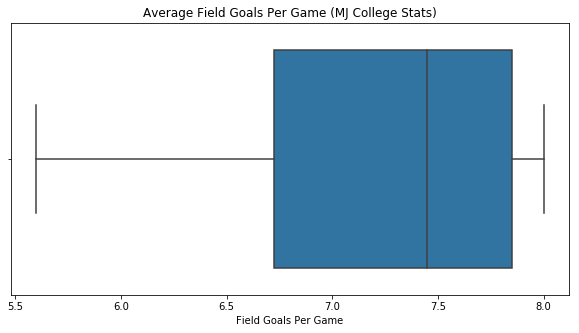

In [168]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Average Field Goals Per Game (MJ College Stats)')
seaborn.boxplot(college_per_game_df['Field Goals Per Game'], ax=ax)
plt.xlabel('Field Goals Per Game')
plt.show()


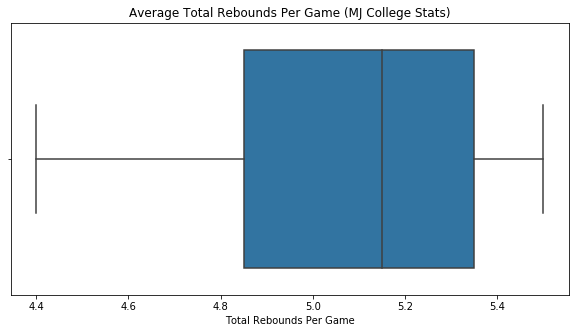

In [169]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Average Total Rebounds Per Game (MJ College Stats)')
seaborn.boxplot(college_per_game_df['Total Rebounds Per Game'], ax=ax)
plt.xlabel('Total Rebounds Per Game')
plt.show()

In [170]:
 # Set x axis and tick locations
x_axis = np.arange(len(college_per_game_df))
tick_locations = [value+0.4 for value in x_axis]

([<matplotlib.axis.XTick at 0x12b98f110>,
 <a list of 4 Text xticklabel objects>)

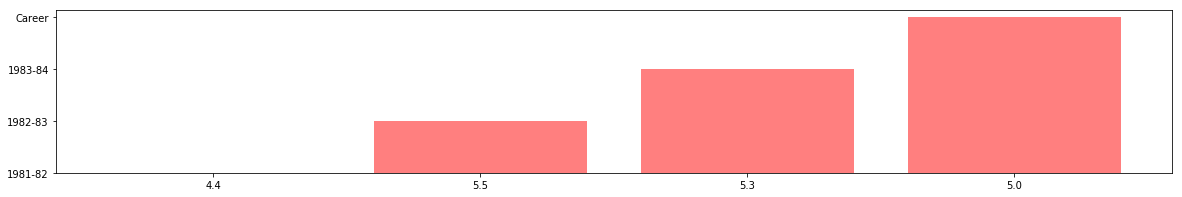

In [171]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, college_per_game_df["Season"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, college_per_game_df["Total Rebounds Per Game"])